In [1]:
import pandas as pd
from plapt import Plapt

In [ ]:
benchmark_data = pd.read_csv("data\\Test2016_290.csv")
    
# Extract sequences and smiles from benchmark dataset
prot_seqs = benchmark_data['seq'].tolist()
mol_smiles = benchmark_data['smiles_can'].tolist()
experimental_pKd = benchmark_data['neg_log10_affinity_M'].tolist()

In [2]:
plapt = Plapt("models/predictionModule.onnx")

In [6]:
predictions = plapt.predict_affinity(prot_seqs,mol_smiles)
predictions = pd.DataFrame(predictions)

In [7]:
predicted_pKd = predictions["neg_log10_affinity_M"]

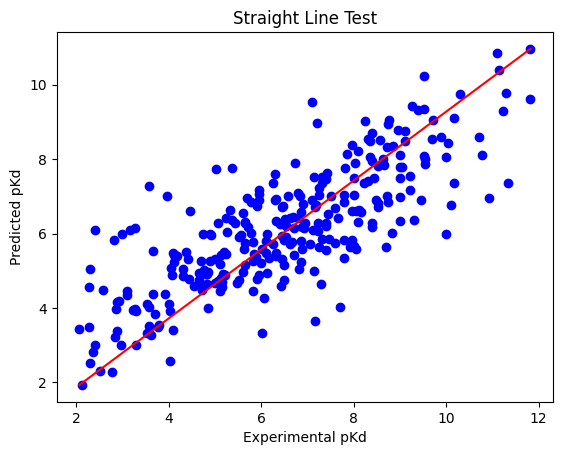

Mean Squared Error (MSE): 1.8337004664031775
Mean Absolute Error (MAE): 1.031961999351108
Root Mean Squared Error (RMSE): 1.3541419668569383
Pearson's Correlation Coefficient: 0.7963593000737728


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Plotting the straight line test
plt.scatter(experimental_pKd, predicted_pKd, color='blue')
plt.plot([min(experimental_pKd), max(experimental_pKd)], [min(predicted_pKd), max(predicted_pKd)], color='red') # Line
plt.xlabel('Experimental pKd')
plt.ylabel('Predicted pKd')
plt.title('Straight Line Test')
plt.show()

# Calculating Metrics
mse = mean_squared_error(experimental_pKd, predicted_pKd)
mae = mean_absolute_error(experimental_pKd, predicted_pKd)
rmse = np.sqrt(mse)
pearson_corr, _ = pearsonr(experimental_pKd, predicted_pKd)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Pearson's Correlation Coefficient:", pearson_corr)
